In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 


[[44 44 50 ... 32 26 26]
 [47 47 50 ... 29 26 26]
 [44 48 46 ... 28 28 28]
 ...
 [13 12 10 ... 37 23 34]
 [ 8  8  9 ... 41 26 37]
 [ 3  3  6 ... 28 20 39]]


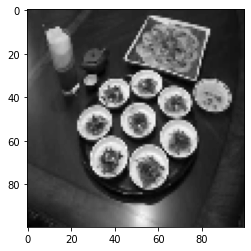

In [3]:
datadrive = "/content/drive/MyDrive/Bài tập AI/10loaimonanVN"
phanloai=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom', 'bun rieu','chao long','com tam','hu tieu','my quang','pho']
img_size=100
for food in phanloai:
  path=os.path.join(datadrive,food)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE) #thay màu cho đối tượng
    new_array = cv.resize(img_array,(img_size,img_size)) #resize lại hình ảnh
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [4]:
#creating training data
training_data=[]
def create_traning_data():

  for food in phanloai:
    path = os.path.join(datadrive,food)
    class_num = phanloai.index(food)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 129/129 [00:08<00:00, 14.65it/s]

2741


In [5]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (2741, 100, 100, 1)
y (2741,)


In [6]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/Bài tập AI/10loaimonanVN/save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/Bài tập AI/10loaimonanVN/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [7]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [8]:
pickle_in = open("/content/drive/MyDrive/Bài tập AI/10loaimonanVN/save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Bài tập AI/10loaimonanVN/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (2741, 100, 100, 1)
y (2741,)


In [9]:
y= to_categorical(y,10)

In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))


In [11]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=30,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/30
39/39 [==============================] - 15s 80ms/step - loss: 2.3611 - accuracy: 0.2015 - val_loss: 3.6945 - val_accuracy: 0.0000e+00
Epoch 2/30
39/39 [==============================] - 2s 57ms/step - loss: 2.0096 - accuracy: 0.2295 - val_loss: 4.5349 - val_accuracy: 0.0000e+00
Epoch 3/30
39/39 [==============================] - 2s 57ms/step - loss: 1.8865 - accuracy: 0.3001 - val_loss: 5.4114 - val_accuracy: 0.1455
Epoch 4/30
39/39 [==============================] - 2s 57ms/step - loss: 1.7190 - accuracy: 0.3824 - val_loss: 7.4064 - val_accuracy: 0.0982
Epoch 5/30
39/39 [==============================] - 2s 57ms/step - loss: 1.5114 - accuracy: 0.4627 - val_loss: 5.7976 - val_accuracy: 0.1164
Epoch 6/30
39/39 [==============================] - 2s 57ms/step - loss: 1.2733 - accuracy: 0.5454 - val_loss: 8.3526 - val_accuracy: 0.1236
Epoch 7/30
39/39 [==============================] - 2s 57ms/step - loss: 1.0746 - accuracy: 0.6164 - val_loss: 8.7224 - val_accuracy: 0.1673
Epoc

In [12]:
model.save('baitap10loaimonanVN.h5')

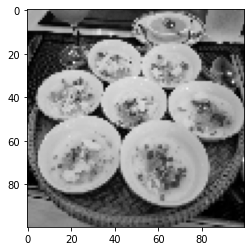

In [13]:
img_test='/content/drive/MyDrive/Bài tập AI/10loaimonanVN/banh beo/112.jpg'
categories=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom', 'bun rieu','chao long','com tam','hu tieu','my quang','pho']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

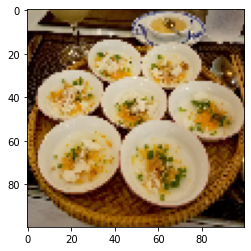

Prediction value: banh beo


In [14]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value:',categories[int(np.argmax(prediction))])

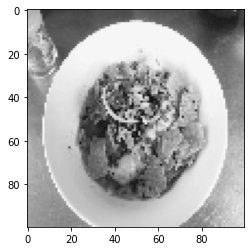

In [15]:
img_test='/content/drive/MyDrive/Bài tập AI/10loaimonanVN/my quang/120.jpg'
categories=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom', 'bun rieu','chao long','com tam','hu tieu','my quang','pho']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

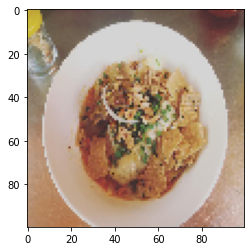

Prediction value: my quang


In [16]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value:',categories[int(np.argmax(prediction))])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation banh trang nuong


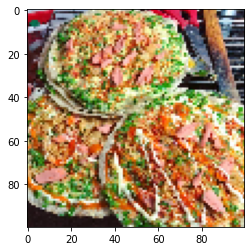

In [20]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'banh beo',
          1: 'banh trang nuong',  
          2: 'bun bo hue',  
          3: 'bun dau mam tom',
          4: 'bun rieu',
          5: 'chao long',
          6: 'com tam',
          7: 'hu tieu',
          8: 'my quang',
          9: 'pho',
          }
model = load_model('baitap10loaimonanVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/10loaimonanVN/test_data/banh trang nuong.jpeg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
expectation bun rieu


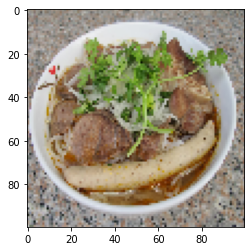

In [31]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'banh beo',
          1: 'banh trang nuong',  
          2: 'bun bo hue',  
          3: 'bun dau mam tom',
          4: 'bun rieu',
          5: 'chao long',
          6: 'com tam',
          7: 'hu tieu',
          8: 'my quang',
          9: 'pho',
          }
model = load_model('baitap10loaimonanVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/10loaimonanVN/test_data/bunbo test.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation banh beo


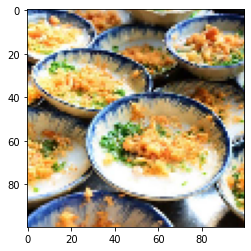

In [32]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'banh beo',
          1: 'banh trang nuong',  
          2: 'bun bo hue',  
          3: 'bun dau mam tom',
          4: 'bun rieu',
          5: 'chao long',
          6: 'com tam',
          7: 'hu tieu',
          8: 'my quang',
          9: 'pho',
          }
model = load_model('baitap10loaimonanVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/10loaimonanVN/test_data/banh beo .jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
expectation com tam


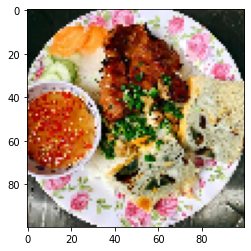

In [27]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'banh beo',
          1: 'banh trang nuong',  
          2: 'bun bo hue',  
          3: 'bun dau mam tom',
          4: 'bun rieu',
          5: 'chao long',
          6: 'com tam',
          7: 'hu tieu',
          8: 'my quang',
          9: 'pho',
          }
model = load_model('baitap10loaimonanVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/10loaimonanVN/test_data/com tam.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
expectation bun dau mam tom


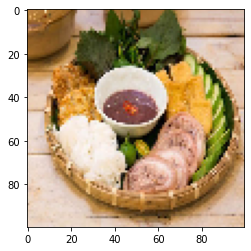

In [33]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'banh beo',
          1: 'banh trang nuong',  
          2: 'bun bo hue',  
          3: 'bun dau mam tom',
          4: 'bun rieu',
          5: 'chao long',
          6: 'com tam',
          7: 'hu tieu',
          8: 'my quang',
          9: 'pho',
          }
model = load_model('baitap10loaimonanVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/10loaimonanVN/test_data/bundau.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
expectation bun rieu


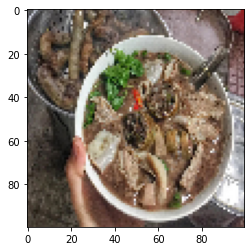

In [34]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'banh beo',
          1: 'banh trang nuong',  
          2: 'bun bo hue',  
          3: 'bun dau mam tom',
          4: 'bun rieu',
          5: 'chao long',
          6: 'com tam',
          7: 'hu tieu',
          8: 'my quang',
          9: 'pho',
          }
model = load_model('baitap10loaimonanVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/10loaimonanVN/test_data/chao-long.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
expectation my quang


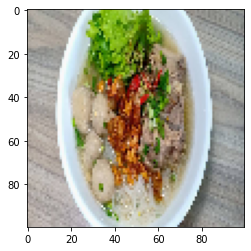

In [35]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'banh beo',
          1: 'banh trang nuong',  
          2: 'bun bo hue',  
          3: 'bun dau mam tom',
          4: 'bun rieu',
          5: 'chao long',
          6: 'com tam',
          7: 'hu tieu',
          8: 'my quang',
          9: 'pho',
          }
model = load_model('baitap10loaimonanVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/10loaimonanVN/test_data/hu tieu.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
expectation my quang


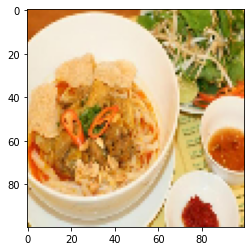

In [36]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'banh beo',
          1: 'banh trang nuong',  
          2: 'bun bo hue',  
          3: 'bun dau mam tom',
          4: 'bun rieu',
          5: 'chao long',
          6: 'com tam',
          7: 'hu tieu',
          8: 'my quang',
          9: 'pho',
          }
model = load_model('baitap10loaimonanVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/10loaimonanVN/test_data/my quang test.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
expectation bun rieu


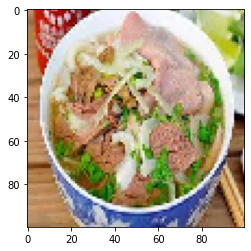

In [37]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'banh beo',
          1: 'banh trang nuong',  
          2: 'bun bo hue',  
          3: 'bun dau mam tom',
          4: 'bun rieu',
          5: 'chao long',
          6: 'com tam',
          7: 'hu tieu',
          8: 'my quang',
          9: 'pho',
          }
model = load_model('baitap10loaimonanVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/10loaimonanVN/test_data/pho ne.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
expectation hu tieu


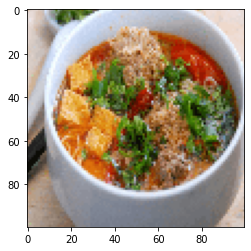

In [39]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'banh beo',
          1: 'banh trang nuong',  
          2: 'bun bo hue',  
          3: 'bun dau mam tom',
          4: 'bun rieu',
          5: 'chao long',
          6: 'com tam',
          7: 'hu tieu',
          8: 'my quang',
          9: 'pho',
          }
model = load_model('baitap10loaimonanVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/10loaimonanVN/test_data/bun-rieu-cua.png')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 